In [1]:
import numpy as np
import sys
sys.path.append('../')
images = '../publication_images'
import pandas as pd
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import pickle
import os
import glob
from pyrrhenious.mixing import ArchiesLawGlover, HashinShtrikmanUpper
from pyrrhenious.mechanisms import SingleValue, StochasticConstant

In [2]:
def get_fig_data(folder):
    source_dir = os.sep.join([folder,'*.png'])
    pngs = glob.glob(source_dir)
    extents=[]
    aspects=[]
    xticks=[]
    yticks =[]
    for png in pngs:
        with open(png[:-4]+'_extent.pkl','rb') as f:
            data = pickle.load(f)
        extents.append(data['extent'])
        aspects.append((np.max(data['xticks'])-np.min(data['xticks']))/((np.max(data['yticks'])-np.min(data['yticks']))))
        xticks.append(data['xticks'])
        yticks.append(data['yticks'])
    return pngs, extents, aspects, xticks, yticks

def prep_fig(png, extent,xticks,yticks,aspect):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    ax.imshow(plt.imread(png),extent=extent,aspect=aspect)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.grid(True)
    return fig, ax

folder = '../publication_images/Yoshino2010'
pngs, extents, aspects, xticks, yticks = get_fig_data(folder)

# Mixing relationships

# For carbonatites, HS seems to work # Yoshino 2010
# for brines, modified archie's law with M = 1.9
Huang et al 2021
# for basalts, modified archie's law with M = 1.05
# F Gaillard 2005 and Yoshino 2010

# HashinStrikman


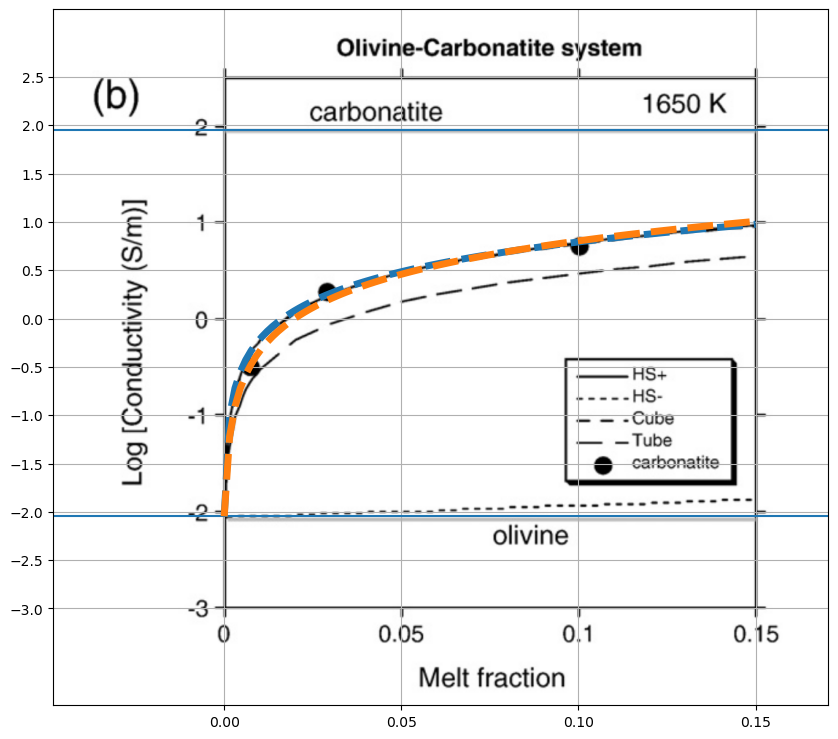

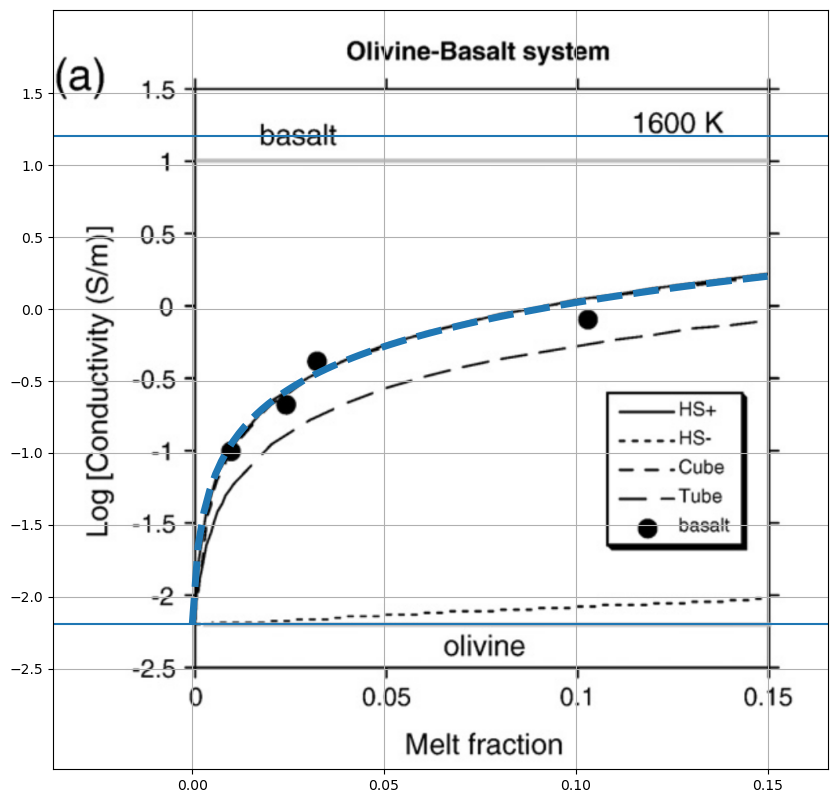

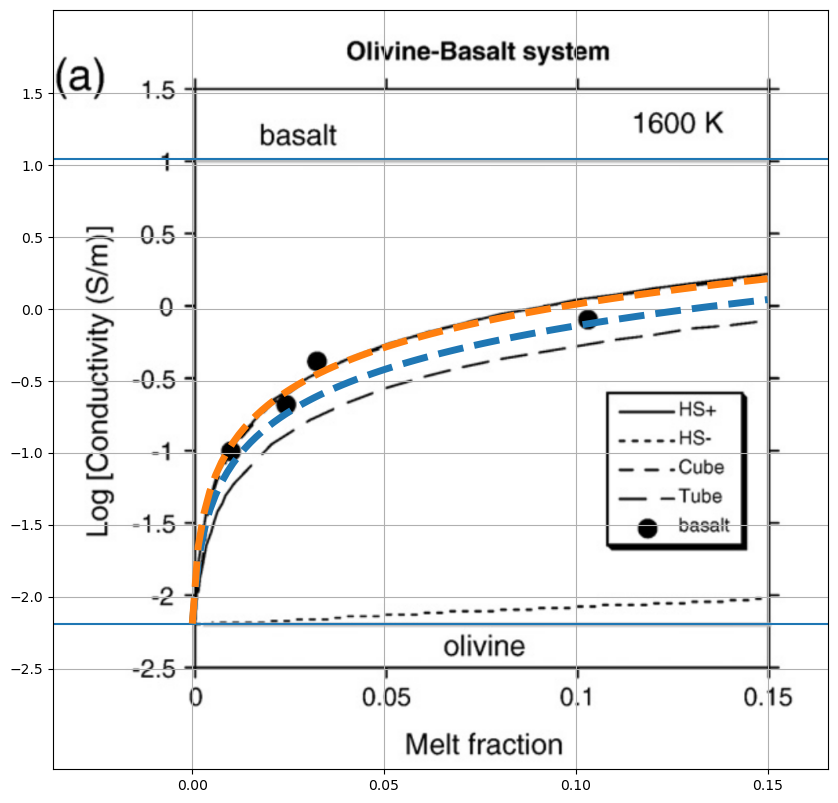

In [8]:
carbonatite  = SingleValue(StochasticConstant(90,None,''))
basalt  = SingleValue(StochasticConstant(16,None,''))

olivine = SingleValue(StochasticConstant(0.009,None,''))
hs = HashinShtrikmanUpper(olivine,carbonatite)#
archiesglover = ArchiesLawGlover(olivine,carbonatite,m=1.15)#
archiesglover2 = ArchiesLawGlover(olivine,carbonatite,m=1.2)#
archiesglover3 = ArchiesLawGlover(olivine,carbonatite,m=1.9)#

for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    porosity = np.linspace(0,.15,num=100)
    ax.axhline(np.log10(carbonatite.get_conductivity()))
    ax.axhline(np.log10(olivine.get_conductivity()))
    for model in [hs,archiesglover]:
        conductivity4 = model.get_conductivity(phi=porosity)
        ax.plot(porosity,np.log10(conductivity4),linestyle='--',linewidth=5)
    break
olivine = SingleValue(StochasticConstant(0.0065,None,''))
hs = HashinShtrikmanUpper(olivine,basalt)#
archiesglover = ArchiesLawGlover(olivine,basalt,m=1.05)#
archiesglover2 = ArchiesLawGlover(olivine,basalt,m=1.2)#
archiesglover3 = ArchiesLawGlover(olivine,basalt,m=1.9)#
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    porosity = np.linspace(0,.15,num=100)
    ax.axhline(np.log10(basalt.get_conductivity()))
    ax.axhline(np.log10(olivine.get_conductivity()))
    for model in [hs]:
        conductivity4 = model.get_conductivity(phi=porosity)
        ax.plot(porosity,np.log10(conductivity4),linestyle='--',linewidth=5)
        
basalt  = SingleValue(StochasticConstant(11,None,''))

olivine = SingleValue(StochasticConstant(0.0065,None,''))
hs = HashinShtrikmanUpper(olivine,basalt)# F Gaillard 2005 and Yoshino 2010
archiesglover = ArchiesLawGlover(olivine,basalt,m=1.01)#
archiesglover2 = ArchiesLawGlover(olivine,basalt,m=1.2)#
archiesglover3 = ArchiesLawGlover(olivine,basalt,m=1.9)#
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    porosity = np.linspace(0,.15,num=100)
    ax.axhline(np.log10(basalt.get_conductivity()))
    ax.axhline(np.log10(olivine.get_conductivity()))
    for model in [hs,archiesglover]:
        conductivity4 = model.get_conductivity(phi=porosity)
        ax.plot(porosity,np.log10(conductivity4),linestyle='--',linewidth=5)
    
        


In [31]:
olivine.get_conductivity(T=porosity)*np.ones(porosity.shape)

array([0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009])

## Ni H. et al., 2011

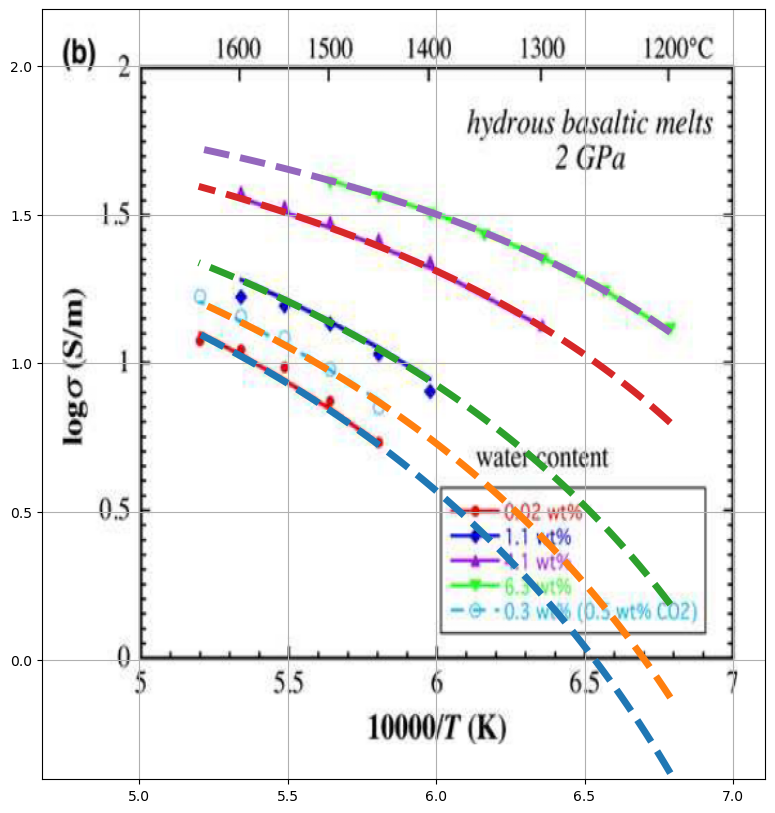

In [11]:
index = 1
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0.02,0.3,1.1,4.1,6.3]:
        c = model.get_conductivity(T=temperature_range,Cw= water*1e4)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)


## Sifre et al., 2014. 

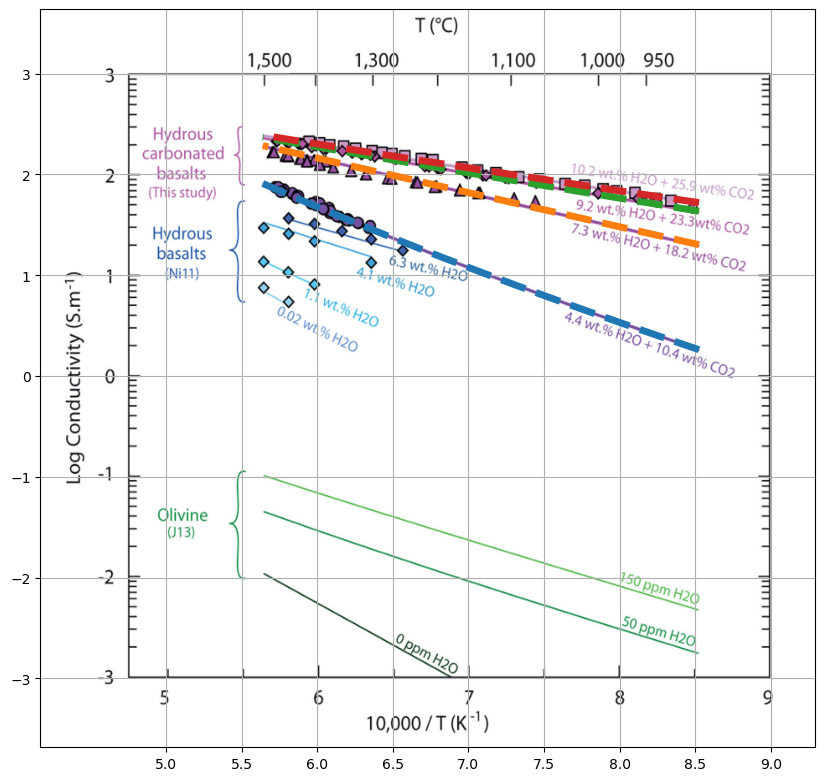

In [12]:
index = 2
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water, co2 in zip([4.4,7.3,9.2,10.2],[10.4,18.2,23.3,25.9]):
        c = model.get_conductivity(T=temperature_range, Cw= water*1e4,co2=co2)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)


## Dai et al., 2015. 

original equation doesn't include a volume term. Adjusting the alpha to 0.3, and fiddling with the preexponentail constants gets something pretty close to the publication graph that includes pressure.

dai_15_basalt:{45.0(5.0) Cw^0.0(nan) exp( -(1.14(0.07) + -0.3(0.09)Cw^0.2(0.09) + P1.43(0.15))/kT)+30.0(5.0) Cw^1.65(0.03) exp( -(1.14(0.07) + -0.3(0.09)Cw^0.2(0.09) + P1.43(0.15))/kT)}


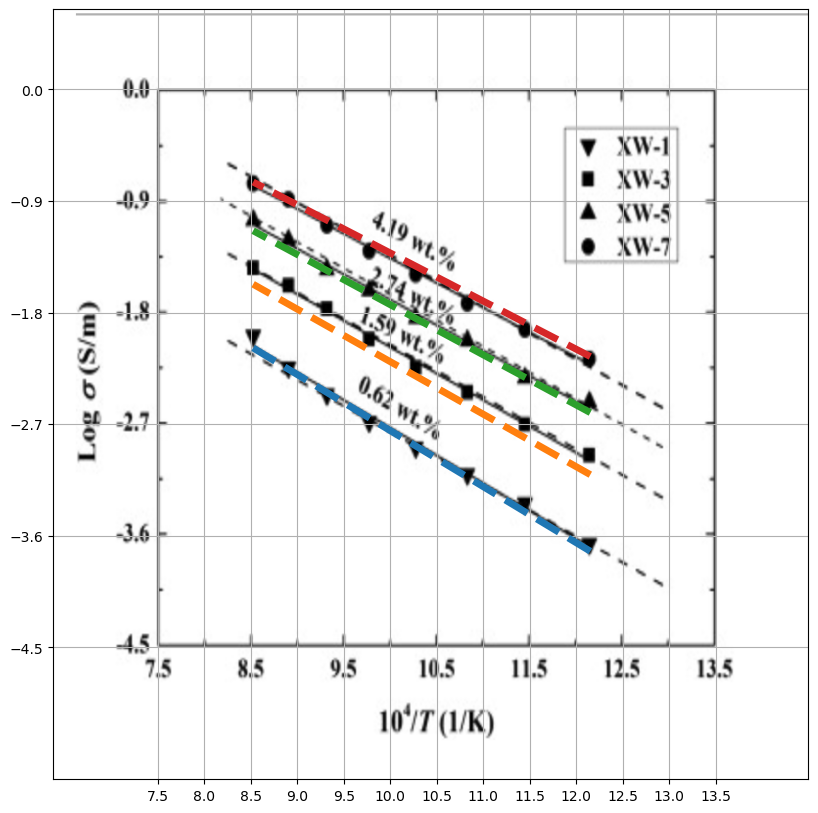

In [13]:
index = 3
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
print(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in np.asarray([0.62,1.59,2.74,4.19]):
        c = model.get_conductivity(T=temperature_range, Cw= water*1e4,P=2)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)

